Liver Data

Import Libraries

In [2]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Import Data

In [3]:

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

LiverData_dataframe = pd.read_csv("LiverData.csv")

# Remove spaces from column names
LiverData_dataframe.columns = LiverData_dataframe.columns.to_series().apply(lambda x: x.strip())

# Rename columns having spaces and special symbols
LiverData_dataframe.rename(columns={"Nausea/Vomting": "Nausea_Vomiting", 
                             "Fatigue & generalized bone ache": "Fatigue_generalized_bone_ache",
                             "Epigastric pain":"Epigastric_pain"}, inplace = True)

#Covert categorical variables to numeric values
LiverData_dataframe["Gender"] = LiverData_dataframe.Gender.astype("category").cat.codes
LiverData_dataframe["Fever"] = LiverData_dataframe.Fever.astype("category").cat.codes
LiverData_dataframe["Nausea_Vomiting"] = LiverData_dataframe.Nausea_Vomiting.astype("category").cat.codes
LiverData_dataframe["Headache"] = LiverData_dataframe.Headache.astype("category").cat.codes
LiverData_dataframe["Diarrhea"] = LiverData_dataframe.Diarrhea.astype("category").cat.codes
LiverData_dataframe["Fatigue_generalized_bone_ache"] = LiverData_dataframe.Fatigue_generalized_bone_ache.astype("category").cat.codes
LiverData_dataframe["Jaundice"] = LiverData_dataframe.Jaundice.astype("category").cat.codes
LiverData_dataframe["Epigastric_pain"] = LiverData_dataframe.Epigastric_pain.astype("category").cat.codes
LiverData_dataframe["Class"] = LiverData_dataframe.Class.astype("category").cat.codes

LiverData_dataframe = LiverData_dataframe.reindex(
    np.random.permutation(LiverData_dataframe.index))

print(LiverData_dataframe.head(10))

      Age  Gender  BMI  Fever  ...  RNA 12  RNA EOT  RNA EF  Class
930    39       1   28      1  ...       5        5       5      0
199    54       0   29      1  ...  556670   771412  100993      3
1359   35       1   23      1  ...  745665   348266  605628      3
861    55       0   33      1  ...       5        5       5      2
387    40       0   32      0  ...       5        5       5      1
436    58       0   31      1  ...  453807   161856  273188      2
1364   60       0   22      1  ...  679822   717422  669698      3
540    43       0   33      0  ...   66179   645660  146936      2
407    54       1   25      1  ...  424905   270316  598588      2
14     40       0   32      1  ...  421304   437544  124609      1

[10 rows x 28 columns]


In [4]:
LiverData_dataframe.shape[0]

1385

Preprocess

In [0]:
def preprocess_features(LiverData_dataframe):

  selected_features = LiverData_dataframe[
    ["Age",
     "Gender",
     "BMI",
     "Fever",
     "Nausea_Vomiting",
     "Headache",
     "Diarrhea",
     "Fatigue_generalized_bone_ache",
     "Jaundice",
     "Epigastric_pain",
     "WBC",
     "RBC",
     "HGB",
     "Plat",
     "AST 1",
     "ALT 1",
     "ALT4",
     "ALT 12",
     "ALT 24",
     "ALT 36",
     "ALT 48",
     "ALT after 24 w",
     "RNA Base",
     "RNA 4",
     "RNA EOT",
     "RNA EF"
     ]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(LiverData_dataframe):

  output_targets = LiverData_dataframe["Class"]
  return output_targets

Baseline Calculation

In [6]:
LiverData_dataframe["Class"].value_counts() / LiverData_dataframe["Class"].size * 100

0   26.1
2   25.6
3   24.3
1   24.0
Name: Class, dtype: float64

Train/Validation Split

In [7]:
# Choose the first 800 examples for training.
training_examples = preprocess_features(LiverData_dataframe.head(1085))
training_targets = preprocess_targets(LiverData_dataframe.head(1085))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)
print(training_examples.head(10))

# Choose the 585 examples for validation.
validation_examples = preprocess_features(LiverData_dataframe.tail(300))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(LiverData_dataframe.tail(300))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


      Age  Gender  BMI  Fever  ...  RNA Base  RNA 4  RNA EOT  RNA EF
930  -0.8     1.0 -0.1    1.0  ...       1.2   -0.8     -1.1    -1.1
199   0.9    -1.0  0.1    1.0  ...       1.7   -1.7      1.8    -0.7
1359 -1.3     1.0 -1.4    1.0  ...      -0.7   -0.1      0.2     1.2
861   1.0    -1.0  1.1    1.0  ...      -1.5   -1.3     -1.1    -1.1
387  -0.7    -1.0  0.8   -1.0  ...      -1.6   -1.5     -1.1    -1.1
436   1.3    -1.0  0.6    1.0  ...      -1.6    0.6     -0.5    -0.1
1364  1.5    -1.0 -1.6    1.0  ...       0.8    1.6      1.6     1.4
540  -0.4    -1.0  1.1   -1.0  ...       0.6   -0.8      1.4    -0.5
407   0.9     1.0 -0.9    1.0  ...       1.4    0.7     -0.1     1.1
14   -0.7    -1.0  0.8    1.0  ...       1.5    1.4      0.6    -0.6

[10 rows x 26 columns]
Training examples summary:


,Age,Gender,BMI,Fever,Nausea_Vomiting,Headache,Diarrhea,Fatigue_generalized_bone_ache,Jaundice,Epigastric_pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA EOT,RNA EF
count,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0
mean,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-1.0,-1.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.7,-1.8,-1.5,-1.7,-1.7,-1.7,-1.6,-1.7,-1.7,-2.9,-3.0,-4.0,-1.7,-1.7,-1.1,-1.1
25%,-0.8,-1.0,-0.9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,-0.9,-0.9,-0.9,-0.9,-0.8,-0.9,-0.9,-0.9,-0.9,-0.8,-0.8,-0.9,-0.9,-1.1,-1.1
50%,-0.0,1.0,0.1,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-0.0,0.1,0.2,-0.0,0.0,-0.0,-0.1,0.0,-0.0,0.0,-0.0,0.1,0.0,-0.0,-0.2,-0.2
75%,0.9,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,0.9,0.8,0.8,0.9,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.9,0.8,0.9,0.9
max,1.7,1.0,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.7,1.7,1.4,1.8,1.8,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.7,1.7,2.0,1.9


Validation examples summary:


,Age,Gender,BMI,Fever,Nausea_Vomiting,Headache,Diarrhea,Fatigue_generalized_bone_ache,Jaundice,Epigastric_pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA EOT,RNA EF
count,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,-0.0,0.1,0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.1,-0.0,0.1,0.0,0.0,0.1,-0.0,0.0,0.1,-0.0,-0.0,0.0,-0.1,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1,1.0,1.0,1.0,1.0,1.0
min,-1.6,-1.0,-1.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.7,-1.8,-1.5,-1.7,-1.7,-1.7,-1.6,-1.7,-1.7,-1.6,-1.7,-1.6,-1.7,-1.7,-1.1,-1.1
25%,-0.9,-1.0,-0.9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.9,-1.1,-0.9,-0.9,-0.8,-0.8,-0.7,-0.8,-0.8,-0.7,-1.0,-0.9,-0.8,-1.0,-1.1,-1.1
50%,0.1,1.0,0.1,1.0,-0.0,-1.0,-0.0,-1.0,-1.0,1.0,-0.0,-0.1,-0.4,0.1,0.0,0.0,0.1,0.0,-0.0,0.1,-0.0,-0.1,0.0,-0.1,-0.1,-0.2
75%,0.8,1.0,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,0.8,1.0,0.9,0.9,0.9,0.8,0.9,0.9,0.9,0.9,0.8,0.8,0.7,0.7
max,1.7,1.0,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.7,1.7,1.4,1.8,1.8,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.7,1.7,2.0,1.9


Training targets summary:


count   1085.0
mean       1.5
std        1.1
min        0.0
25%        0.0
50%        2.0
75%        2.0
max        3.0
Name: Class, dtype: float64

Validation targets summary:


count   300.0
mean      1.5
std       1.1
min       0.0
25%       1.0
50%       1.0
75%       2.0
max       3.0
Name: Class, dtype: float64

In [8]:
training_examples.shape

(1085, 26)

Build Model

In [9]:
baseline_model = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    #keras.layers.Dense(40, activation=tf.nn.relu,),
    keras.layers.Dense(30, activation=tf.nn.relu,),
    keras.layers.Dense(4, activation = tf.nn.softmax)

  ])

baseline_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['sparse_categorical_crossentropy'])
baseline_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1350      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 124       
Total params: 3,004
Trainable params: 3,004
Non-trainable params: 0
_________________________________________________________________


Fit Model

In [14]:

#class PrintDot(keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs):
#    if epoch % 100 == 0: print('')
#    print('.', end='')

EPOCHS = 600
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0
                    #callbacks=[callback]
                    )
x = pd.DataFrame(b_history.history)
x

,loss,sparse_categorical_crossentropy,val_loss,val_sparse_categorical_crossentropy
0,0.0,0.0,13.6,13.6
1,0.0,0.0,13.6,13.6
2,0.0,0.0,13.6,13.6
3,0.0,0.0,13.6,13.6
4,0.0,0.0,13.7,13.7
...,...,...,...,...
595,0.0,0.0,28.0,28.0
596,0.0,0.0,28.1,28.1
597,0.0,0.0,28.1,28.1
598,0.0,0.0,28.2,28.2


,loss,sparse_categorical_crossentropy,val_loss,val_sparse_categorical_crossentropy
0,1.4,1.4,1.4,1.4
1,1.3,1.3,1.4,1.4
2,1.3,1.3,1.5,1.5
3,1.3,1.3,1.4,1.4
4,1.2,1.2,1.5,1.5
...,...,...,...,...
95,0.0,0.0,7.5,7.5
96,0.0,0.0,7.6,7.6
97,0.0,0.0,7.7,7.7
98,0.0,0.0,7.8,7.8


In [15]:
print(max(b_history.history['val_sparse_categorical_crossentropy']))

28.230911


Plot Results

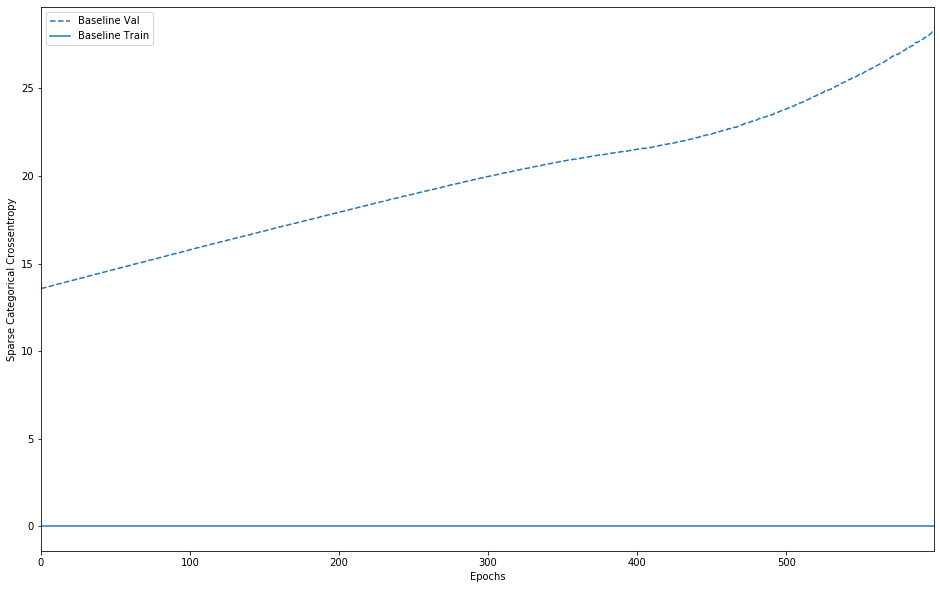

In [16]:
import matplotlib.pyplot as plt


def plot_history(histories, key='sparse_categorical_crossentropy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  #plt.ylim([0,1])

plot_history([('baseline', b_history)])

Predictions

In [17]:
valpreds = baseline_model.predict_on_batch(validation_examples)
print(valpreds)

tf.Tensor(
[[4.85896544e-06 9.99995112e-01 2.80085156e-11 2.16645653e-08]
 [1.86958686e-01 8.13041389e-01 3.04437024e-14 7.33209040e-23]
 [8.81347273e-24 2.41175348e-06 9.99993563e-01 4.08018104e-06]
 ...
 [0.00000000e+00 1.14877066e-20 1.08539025e-23 1.00000000e+00]
 [2.63676928e-11 9.97056842e-01 1.40518341e-18 2.94315675e-03]
 [1.05446647e-03 1.33808551e-03 2.44079232e-01 7.53528237e-01]], shape=(300, 4), dtype=float32)


In [0]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets)

<BarContainer object of 50 artists>

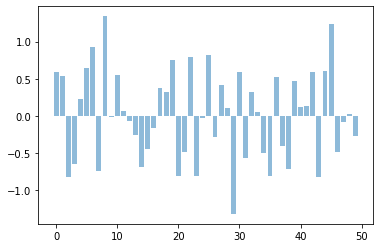

In [18]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

Regularized Models

In [0]:
l1_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(4, activation= tf.nn.softmax)
  ])

l1_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['sparse_categorical_crossentropy'])

l2_model = keras.Sequential([
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(4, activation= tf.nn.softmax)
  ])

l2_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['sparse_categorical_crossentropy'])


  


In [21]:
l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    #callbacks=[PrintDot()]
                    )
l2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    #callbacks=[PrintDot()]
                    )

x = pd.DataFrame(b_history.history)
x

,loss,sparse_categorical_crossentropy,val_loss,val_sparse_categorical_crossentropy
0,0.0,0.0,13.6,13.6
1,0.0,0.0,13.6,13.6
2,0.0,0.0,13.6,13.6
3,0.0,0.0,13.6,13.6
4,0.0,0.0,13.7,13.7
...,...,...,...,...
595,0.0,0.0,28.0,28.0
596,0.0,0.0,28.1,28.1
597,0.0,0.0,28.1,28.1
598,0.0,0.0,28.2,28.2


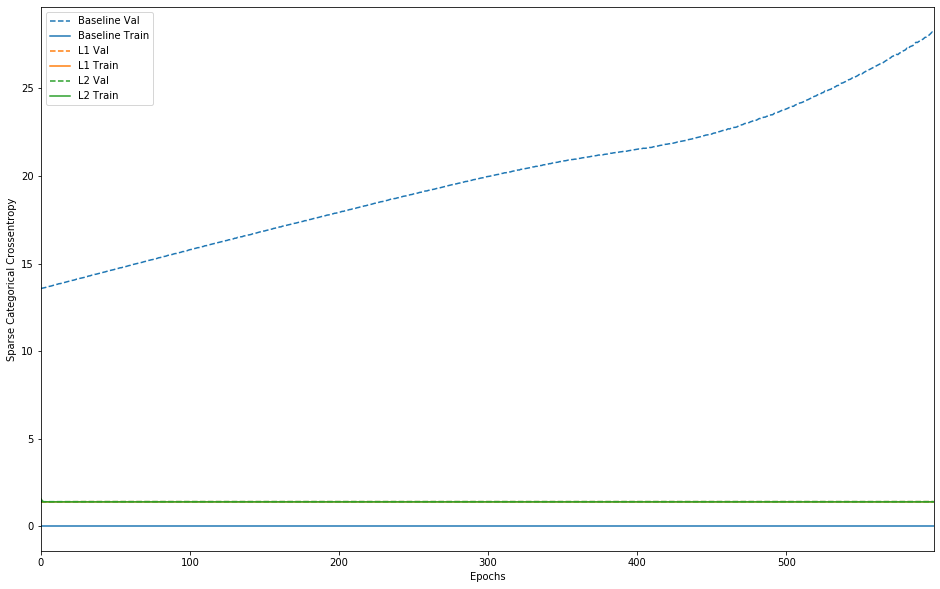

In [22]:
# Plot history Multiple
plot_history([('baseline', b_history),
              ('L1', l1_history),
              ('L2', l2_history)])